## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Data Loading

In [4]:
# Load the dataset
df = pd.read_csv('scrape_and_cleaning/data_cleaned.csv')

# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        287 non-null    object 
 1   feature        287 non-null    object 
 2   brand          287 non-null    object 
 3   price          287 non-null    float64
 4   rating         287 non-null    float64
 5   color          287 non-null    object 
 6   ear_placement  287 non-null    object 
 7   form_factor    287 non-null    object 
 8   impedance      287 non-null    object 
 9   image_url      287 non-null    object 
 10  reviews        287 non-null    object 
dtypes: float64(2), object(9)
memory usage: 24.8+ KB


In [5]:
# Display first five rows of the dataset
df.head()

,product,feature,brand,price,rating,color,ear_placement,form_factor,impedance,image_url,reviews
0,Baseus Eli Sport 2 Open-Ear Headphones Wireles...,"Secure Earhook Sport Design,Ultra-Comfort,4-Mi...",Baseus,19.99,4.0,White,Open Ear,Open Ear earbuds /Over the ear earbuds,16 Ohms,https://m.media-amazon.com/images/I/41iRmtTvb9...,"[{'review': 'I\'ve got to be honest, I\'m blow..."
1,Baseus Inspire XP1 Adaptive Noise Cancelling E...,"Sound by Bose, Dolby Audio, Premium Real-Time ...",Baseus,109.99,4.6,Cosmic Black,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/51L6GgSj6p...,"[{'review': ""Pretty good for the price. They s..."
2,Baseus Eli Sport 2 Open-Ear Headphones Wireles...,"Secure Earhook Sport Design,Ultra-Comfort,4-Mi...",Baseus,19.99,4.0,Green,Open Ear,Open Ear earbuds /Over the ear earbuds,16 Ohms,https://m.media-amazon.com/images/I/51MZtudDew...,"[{'review': 'I\'ve got to be honest, I\'m blow..."
3,Baseus Bass BP1 Pro Noise Cancelling Wireless ...,"Real-Time Adaptive Noise Cancelling, Adaptive ...",Baseus,23.99,4.3,Space Black,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/51qpokZ6oO...,[{'review': 'Have you ever felt the gut rumbli...
4,Baseus Bass BP1 NC Hybrid Active Noise Cancell...,"12mm Super-Bass Driver, 41H Playtime, Bluetoot...",Baseus,21.99,4.6,Black,In Ear,In Ear,16 Ohms,https://m.media-amazon.com/images/I/51RyPpxGPH...,"[{'review': 'The sound quality is clean, and t..."


In [6]:
# Show value counts for 'form_factor' column
df['form_factor'].value_counts()

form_factor
In Ear                                    228
True Wireless                              26
Over Ear                                   11
Open Ear                                   11
On Ear                                      3
Open Ear earbuds /Over the ear earbuds      3
open ear                                    3
Open ear                                    2
Name: count, dtype: int64

In [7]:
# Standardize 'form_factor' entries
df['form_factor'] = df['form_factor'].replace({
    'Open ear': 'Open Ear',
    'open ear': 'Open Ear',
    'Open Ear earbuds /Over the ear earbuds': 'Open/Over Ear Earbuds'
})

In [8]:
# Show value counts for 'form_factor' column after standardization
df['form_factor'].value_counts()

form_factor
In Ear                   228
True Wireless             26
Open Ear                  16
Over Ear                  11
Open/Over Ear Earbuds      3
On Ear                     3
Name: count, dtype: int64

## Exploratory Data Analysis

### 1.

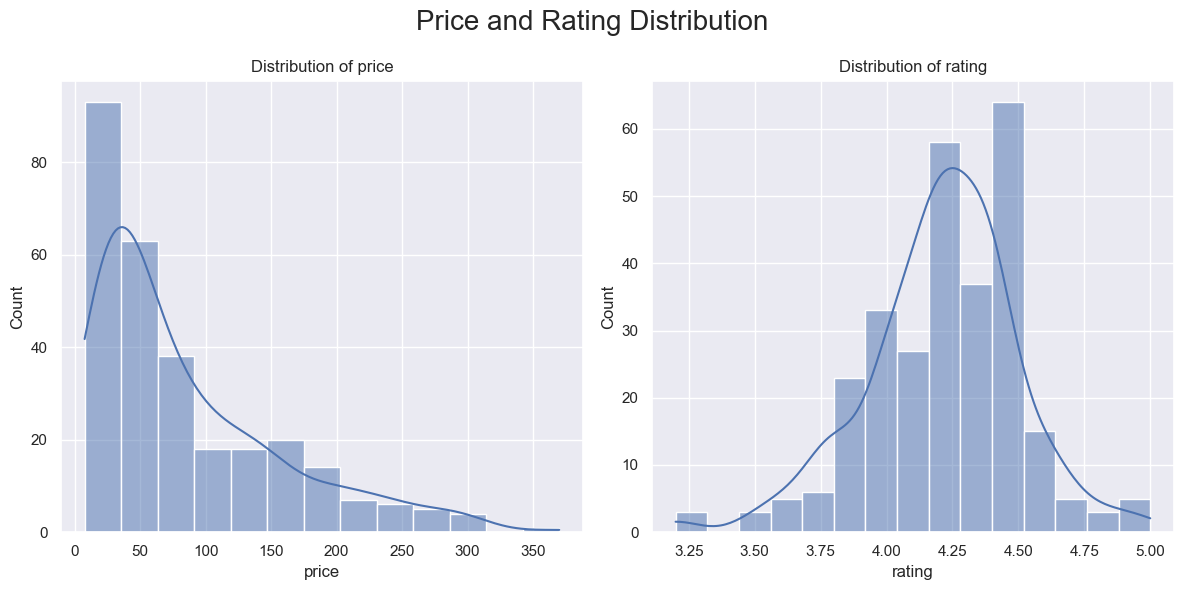

In [9]:
# Visualisasi distribusi tiap kolom numeric
num_col = ('price', 'rating')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Price and Rating Distribution', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], 
                kde=True, 
                ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Analysis:**

Based on this plot, we can see how the distribution both of the features. Price has a skewed distribution where there are some outlier where headphone with a high price and small amount, usually a pricy headphone with high performance or even luxury. 

For Ratings, it is normally distributed where the median is around 4.25 score, where we can decide that it is a positive sentiments score review for bunch of the products that shows the group of these products has a good and decent performance based on review score alone.

### 2.

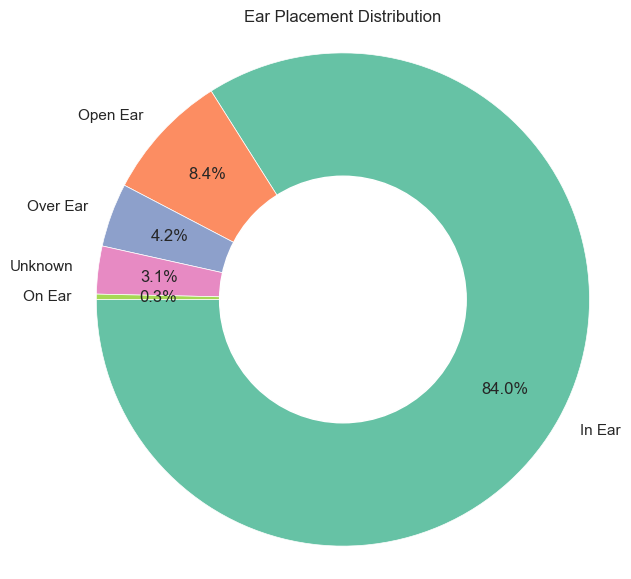

In [10]:
plt.figure(figsize=(7, 7))
plt.pie(
    df['ear_placement'].value_counts().values,
    labels=df['ear_placement'].value_counts().index,
    autopct='%1.1f%%',
    startangle=180,
    labeldistance=1.1,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
    colors=sns.color_palette('Set2')
)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Ear Placement Distribution')
plt.axis('equal')
plt.show()

**Analysis:**

Based on this chart, most of the headphone product has the Ear Placement type as In Ear and small amount on any other type. Based on this we also find that most popular product with In Ear placement, as more its requested, more its produced and improved based on this type.

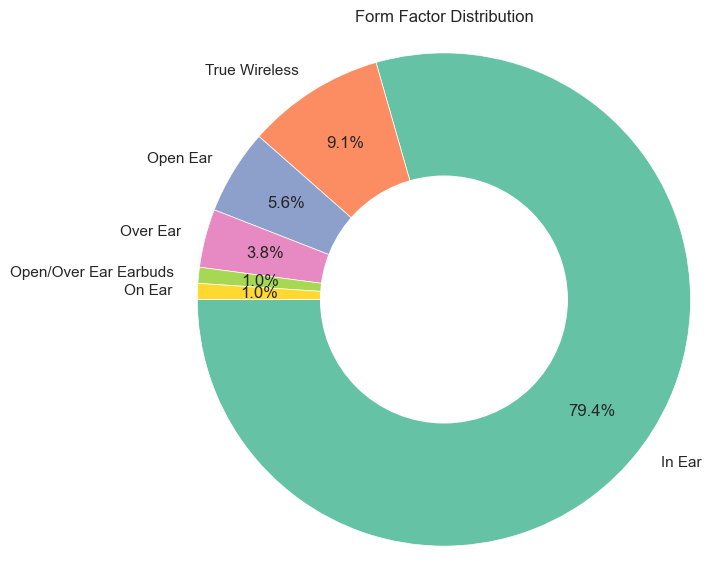

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(
    df['form_factor'].value_counts().values,
    labels=df['form_factor'].value_counts().index,
    autopct='%1.1f%%',
    startangle=180,
    labeldistance=1.1,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
    colors=sns.color_palette('Set2')
)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Form Factor Distribution')
plt.axis('equal')
plt.show()

**Analysis:**

Based on this chart, the most form factor of this product also In Ear type, we can also assume that this type of product is the most popular and demanded product. In Ear form factor still uses wire also very light easy to carry, and with or without earbuds as comfort in ear.

### 3.

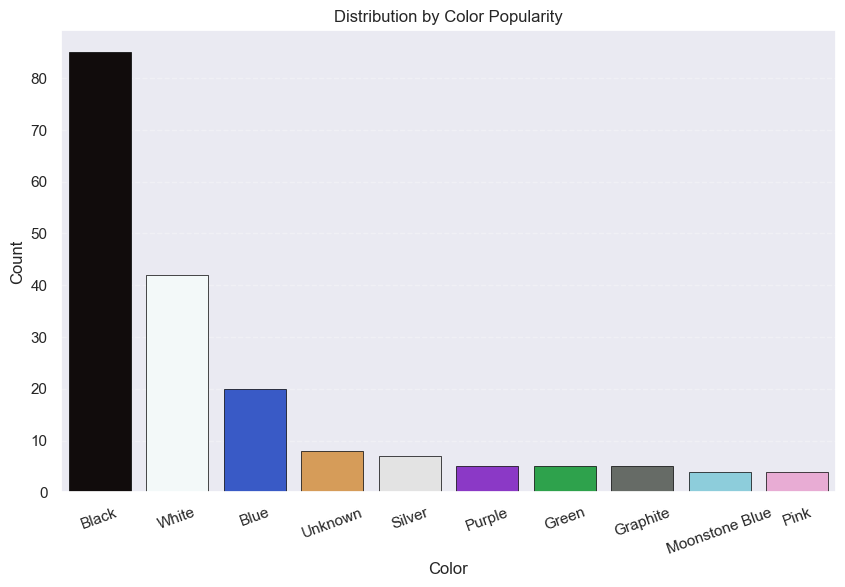

In [12]:
# Distribution by Top 10 Color

top_colors = df['color'].value_counts().nlargest(10)
top_colors_names = top_colors.index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['color'].isin(top_colors_names)],
              x='color',
              dodge=False,
              order=top_colors_names,
              edgecolor='black',
              linewidth=0.5,
              palette=['#120B0B', '#F2FAFA', '#224EDD', '#EB9D44', '#E3E3E3', 
                        '#8F21DE', '#1BB542', '#656C65', '#80D5E8', '#F2A2D7'])
plt.title('Distribution by Color Popularity')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

**Analysis:**

Most of the product are colored Black and White, which is very common because these are neutral color which is very popular because less tied to fashion trends and universally acceptable, which is why manufacturer priotize to product to appeal to the mass and only small niche number of people to use colored ones.

### 4.

In [13]:
# Top 10 Brands by Average Price
average_price = (df
                .groupby('brand')['price']
                .mean()
                .reset_index()
                .sort_values(by='price', ascending=False)
                .head(10))
average_price.rename(columns={'price': 'average_price'}, inplace=True)

average_price

,brand,average_price
1,Bose,195.747353
16,Sennheiser,179.031538
15,Samsung,97.327619
5,Golrex,89.980000
6,Huawei,88.995000
13,Realme,74.034545
7,Jbl,67.036667
18,Skullcandy,63.878889
11,Monster,59.990000
10,Lenovo,55.990000


In [23]:
# Top 10 Brands by Lowest Average Price
average_price_l = (df
                .groupby('brand')['price']
                .mean()
                .reset_index()
                .sort_values(by='price', ascending=True)
                .head(10))
average_price_l.rename(columns={'price': 'average_price'}, inplace=True)

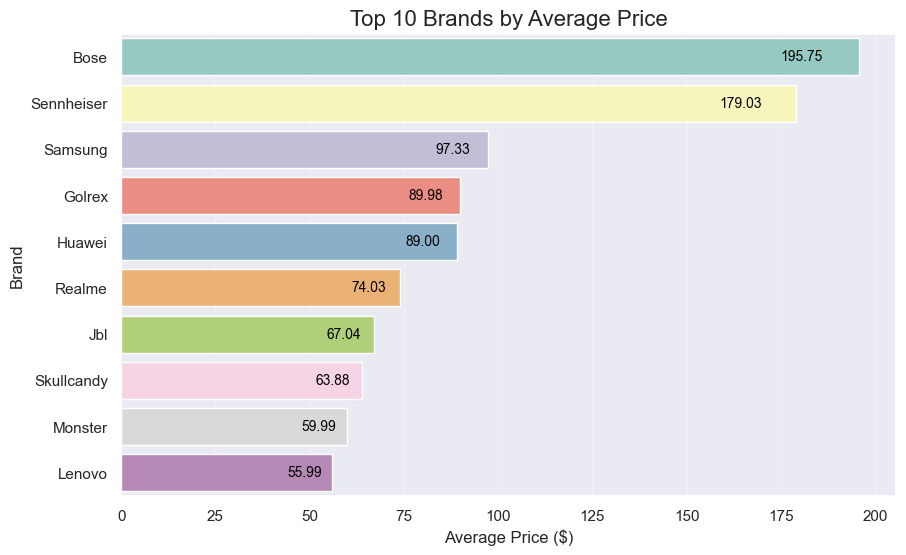

In [14]:
# Visualization of Top 10 Brands by Average Price
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_price,
                x='average_price', 
                y='brand', 
                hue='brand', 
                palette='Set3',
                dodge=False)

plt.title('Top 10 Brands by Average Price', fontsize=16)
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width - 0.05*width, p.get_y() + p.get_height()/2),
                ha='right',
                va='center',
                color='black',
                fontsize=10)
plt.show()

**Analysis:**

Bose and Sennheiser brands have a high average price doubling the average medium price, for a headphone shows that these are premium and high-end headphone product if compared with other product as these price reflects their brand equity and sound quality. Consumers might go for cheaper products as the common population of headphone buyers go for relatively cheaper with decent sound quality.

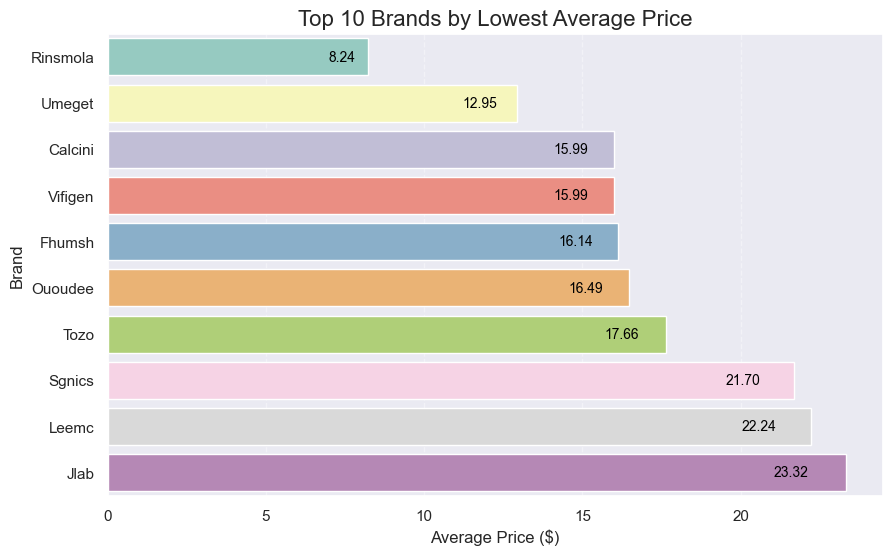

In [24]:
# Visualization of Top 10 Brands by Lowest Average Price
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_price_l,
                x='average_price', 
                y='brand', 
                hue='brand', 
                palette='Set3',
                dodge=False)

plt.title('Top 10 Brands by Lowest Average Price', fontsize=16)
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width - 0.05*width, p.get_y() + p.get_height()/2),
                ha='right',
                va='center',
                color='black',
                fontsize=10)
plt.show()

**Analysis:**

With this plot, we can get which brand that offers cheapest brand of headphones. This top 10 brands gives a relatively cheap price of headphones that suit customer that doesn't go for high quality headphone and ready to use headphones.

### 5.

In [15]:
# Top 10 Brands by Average Rating
average_rating = (df
                .groupby('brand')['rating']
                .mean()
                .reset_index()
                .sort_values(by='rating', ascending=False)
                .head(10))
average_rating.rename(columns={'rating': 'average_rating'}, inplace=True)

average_rating

,brand,average_rating
5,Golrex,5.000000
17,Sgnics,5.000000
4,Fhumsh,4.900000
9,Leemc,4.850000
23,Vifigen,4.600000
19,Sony,4.400000
8,Jlab,4.400000
3,Cmf By Nothing,4.400000
24,Xiaomi,4.350000
13,Realme,4.318182


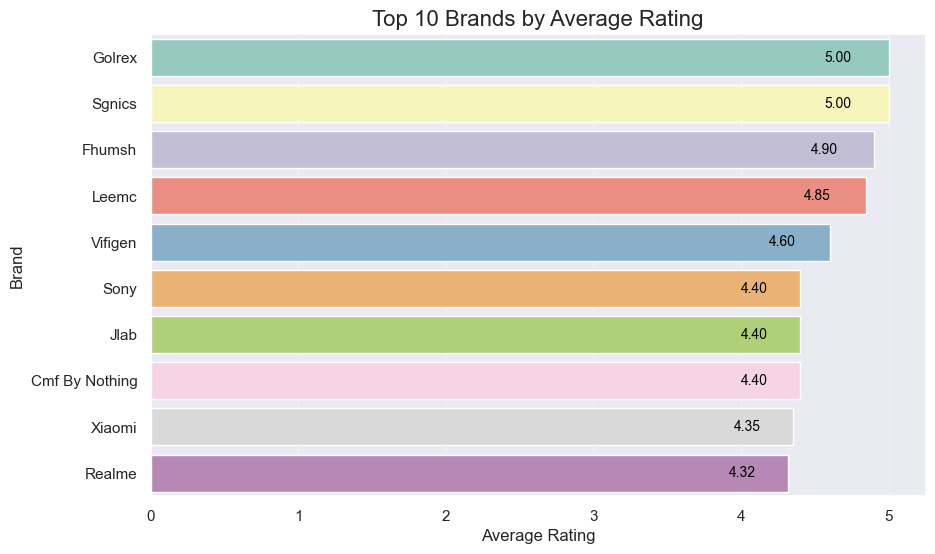

In [16]:
# Visualization of Top 10 Brands by Average Rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_rating,
                x='average_rating', 
                y='brand', 
                hue='brand', 
                palette='Set3',
                dodge=False)

plt.title('Top 10 Brands by Average Rating', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width - 0.05*width, p.get_y() + p.get_height()/2),
                ha='right',
                va='center',
                color='black',
                fontsize=10)
plt.show()

**Analysis:** 

These top 10 brands have a relatively high average rating, with this consumer can get an insight on which brand that have best product they can based their decision on. While exploring these brands, consumer may find which product that suit their demand after exploring deeper the quality and the price of the choosen product.

### 6.

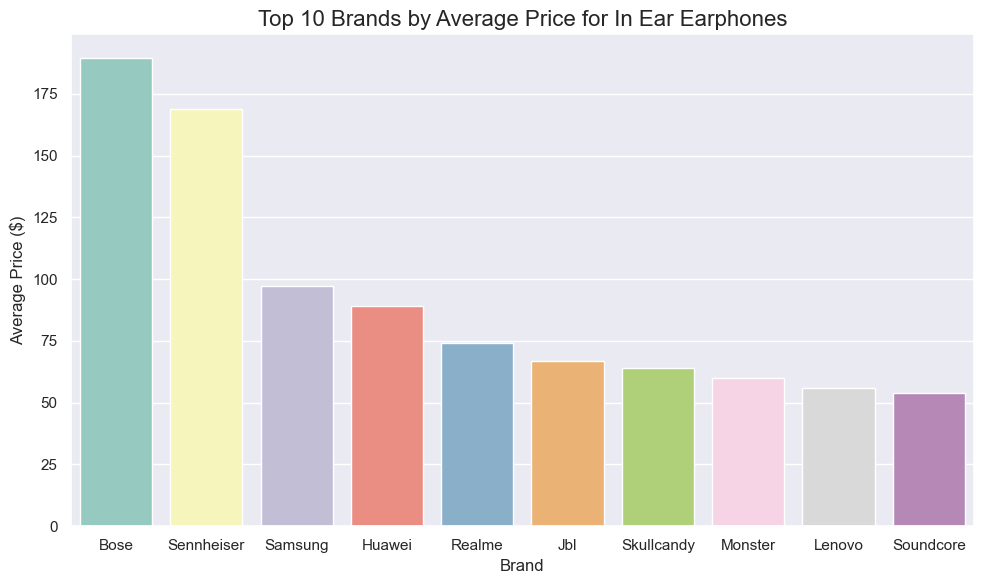

In [17]:
# Filter ear placement for 'In Ear' type
df_in_ear = df[df['ear_placement'] == 'In Ear']

avg_in_ear_price = (df_in_ear
                    .groupby('brand')['price']
                    .mean()
                    .reset_index()
                    .sort_values(by='price', ascending=False)
                    .head(10))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_in_ear_price,
                x='brand',
                y='price',
                hue='brand',
                palette='Set3')

plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.title('Top 10 Brands by Average Price for In Ear Earphones', fontsize=16)
plt.tight_layout()
plt.show()

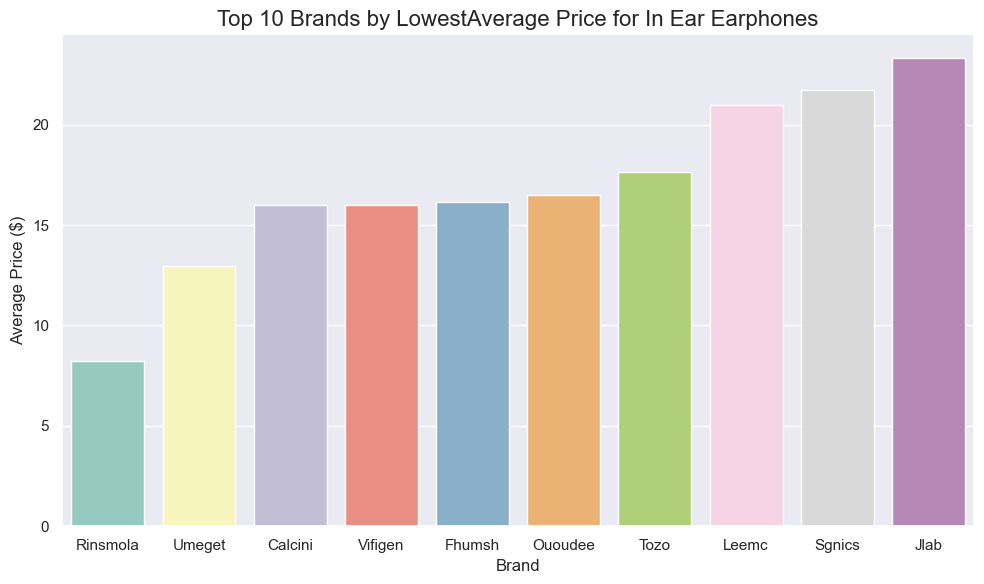

In [ ]:
avg_in_ear_price_l = (df_in_ear
                    .groupby('brand')['price']
                    .mean()
                    .reset_index()
                    .sort_values(by='price', ascending=True)
                    .head(10))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_in_ear_price_l,
                x='brand',
                y='price',
                hue='brand',
                palette='Set3')

plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.title('Top 10 Brands by Lowest Average Price for In Ear Earphones', fontsize=16)
plt.tight_layout()
plt.show()

**Analysis:**

Because most of the product Ear Placement is In Ear headphone type, this chart shows which brand that has the top quality In Ear headphones based on the pricing. Still, Bose, Sennheiser and Samsung has the top place, show these brand has high popularity and luxury for the average price of their headphone product. For high-end buyer may go for these brands, or for medium-level buyer may go for brand like Huawei, Realme and the other, as they offer relatively cheaper price and still has high quality sound based on those price.

### 7.

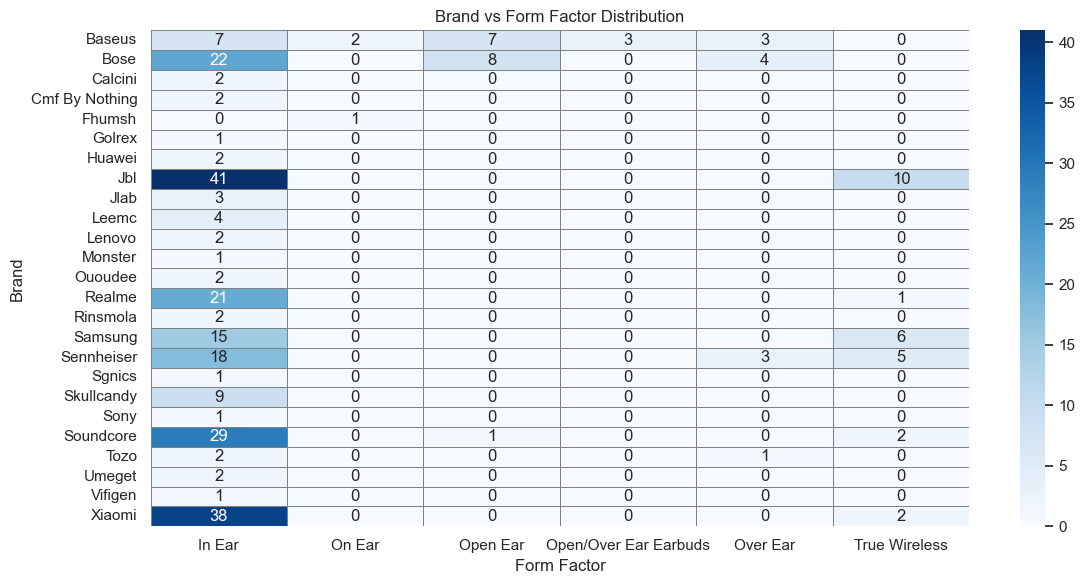

In [18]:
# Create pivot table
pivot_form = pd.pivot_table(df, 
                            index='brand',
                            columns='form_factor',
                            aggfunc='size',
                            fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_form,
            annot=True,
            linewidth=0.5,
            linecolor='gray',
            fmt='d',
            cmap='Blues')
plt.title('Brand vs Form Factor Distribution')
plt.xlabel('Form Factor')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

**Analysis:**

This chart shows each brand and what type of Form Factor product they produce. Almost none of the brand produce Form Factor like On Ear, Open Ear, Open/Over Ear Earbuds, Over Ear except for Baseus, this shows that Baseus gives many choice of Form Factor type for consumer to choose. Most of the brand priotize focuse on producing In Ear type as we can assume it is mostly demanded product in market. Even though Baseus produce many type of Form Factor, but it doesn't produce True Wireless product, instead the other brands mostly produce In Ear and True Wireless type product. With this, consumer may get an insight if they want many variety of type, they may go for Basues or if they want True Wireless they may go for other brand, like Jbl that has multiple True Wireless product.

## Conclusion

**Summary:**

- Mostly the ratings show positive engagement based on the review score, that shows that most of the product gives relatively good performance based on their sound quality or the comfort it gives.
- Some of the premium tier headphone product on this batch, which mostly for the high-end luxury buyer.
- Most of the type of the headphone is In Ear type, whether the type of Ear Placement or Form Factor, shows that the market priotize to go for In Ear type headphone rather than other type, so it is a common occurance of mass produce of these type of headphones.
- Most of the headphones colored Black and White, as they are neutral color, very fit for daily use that mostly doesn't tied to fashion trend. As for the colored one, usually only for small number amount of consumer as it is very rare.
- Brand like Bose and Sennheiser offers a high-end product as they have a relatively high price for a headphone, consumer with high purchase power may go for these products, or consumer may just go for brand like Huawei to Lenovo that offers relatively cheaper price and also good sound quality based on the price offered. Buyer may go for brand like Rinsmola, Umeget, Calcini for a relatively cheap headphone that doesn't offer high quality one but still gives a working ready to use headphone.
- Brand like Baseus offers variety of headphone type to purchase, consumer may go for this Brand if they're looking for different type of headphone, because other brand doesn't have that many variety, but it lacks True Wireless type. Consumer then may go for other brand if they're looking for True Wireless type headphone.